In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data.shape

(11914, 16)

In [6]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [8]:
data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [10]:
data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
str_columns = list(data.dtypes[data.dtypes == "object"].index)

In [12]:
str_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [13]:
for col in str_columns:
    data[col] = data[col].str.lower().str.replace(" ", "_")

In [14]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='msrp', ylabel='Count'>

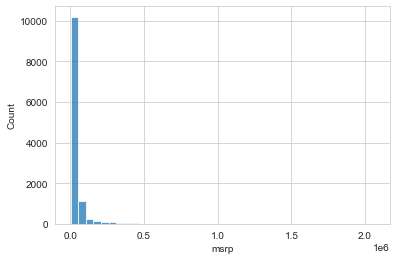

In [18]:
sns.histplot(data.msrp, bins=40)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

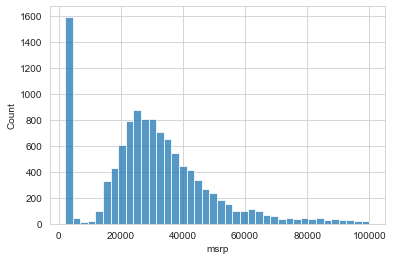

In [19]:
sns.histplot(data.msrp[data.msrp<100000], bins=40)

In [20]:
import numpy as np

In [21]:
log_data = np.log1p(data.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

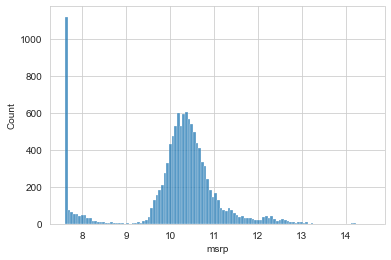

In [22]:
sns.histplot(log_data)

In [23]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [25]:
n = len(data)

In [26]:
n_val = int(0.15 * n)
n_test = int(0.15 * n)
n_train = n - (n_val + n_test)

In [27]:
np.random.seed(42)

In [28]:
idx = np.arange(n)

In [29]:
np.random.shuffle(idx)

In [30]:
idx

array([3995, 7474, 7300, ..., 5390,  860, 7270])

In [31]:
data_shuffled = data.iloc[idx]

In [32]:
data_shuffled.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3995,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
7474,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
7300,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650
3148,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170
747,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,2000


In [33]:
data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

In [34]:
data_train.shape

(8340, 16)

In [35]:
y_train = np.log1p(data_train.msrp.values)
y_val = np.log1p(data_val.msrp.values)
y_test = np.log1p(data_test.msrp.values)

In [37]:
del data_train["msrp"]
del data_test["msrp"]
del data_val["msrp"]

In [38]:
data_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [40]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg","popularity"]

In [41]:
data_num = data_train[base]

In [42]:
data_num = data_num.fillna(0)

In [43]:
data_num.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [44]:
X_train = data_num.values

In [45]:
w_0, w = train_linear_regression(X_train, y_train)

In [46]:
y_pred = w_0 + X_train.dot(w)

In [47]:
def rmse(y, y_pred):
    error = y_pred-y
    mse  = (error**2).mean()
    return np.sqrt(mse)

In [48]:
rmse(y_train, y_pred)

0.7534764940614554

In [49]:
data_num = data_val[base]

In [50]:
data_num = data_num.fillna(0)
X_val = data_num.values

In [53]:
y_pred = w_0 + X_val.dot(w)

In [54]:
rmse(y_val, y_pred)

0.7396293330627383

In [55]:
def prepare_X(data):
    data_num = data[base]
    data_num = data_num.fillna(0)
    X = data_num.values
    return X

In [56]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)

In [58]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 0.7396293330627383


In [59]:
def prepare_X(data):   
    data = data.copy()
    feature = base.copy()
    data["age"] = 2017-data.year
    feature.append("age")
    data_num = data[feature]
    data_num = data_num.fillna(0)
    X = data_num.values
    return X

In [60]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)

In [61]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 0.5062765673626448


In [62]:
data.number_of_doors.value_counts()

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64

In [72]:
def prepare_X(data):   
    data = data.copy()
    features = base.copy()
    data["age"] = 2017-data.year
    features.append("age")  
    for v in [2,3,4]:
        feature = "num_doors_%s" %v
        data[feature] = (data["number_of_doors"] == v).astype(int)
        features.append(feature)      
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        data[feature] = (data['make'] == v).astype(int)
        features.append(feature)
    data_num = data[features]
    data_num = data_num.fillna(0)
    X = data_num.values
    return X

In [73]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 0.49498138000463826


In [74]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [75]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 115.11918034528615


In [76]:
X_train.shape

(8340, 38)

In [79]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r*np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [82]:
for r in [0.001, 0.01, 0.1, 1 ,10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r = r)
    print("%5s, %.2f, %.2f, %.2f" %(r, w_0, w[13], w[21]))

0.001, 7.45, -0.09, 1.90
 0.01, 7.43, -0.09, 1.90
  0.1, 7.28, -0.09, 1.86
    1, 6.35, -0.09, 1.62
   10, 4.52, -0.07, 1.13


In [83]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train, r = 0.001)
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 0.44945183047679926


In [84]:
X_train = prepare_X(data_train)
X_val = prepare_X(data_val)
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.44945191116666916
0.0001 0.4494540231230776
 0.001 0.44945183047679926
  0.01 0.4494304408972553
   0.1 0.4492687917985319
     1 0.4497447786658369
     5 0.45487047516713214
    10 0.46017016344932754


In [85]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train, r = 0.01)
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print("Validation:", rmse(y_val, y_pred))

Validation: 0.4494304408972553


In [86]:
X_train = prepare_X(data_train)
y_pred = w_0 + X_train.dot(w)
print("Validation:", rmse(y_train, y_pred))

Validation: 0.4646065014921197


In [87]:
ad = {
'city_mpg': 18,	
'driven_wheels': 'all_wheel_drive',
'engine_cylinders': 6.0,
'engine_fuel_type': 'regular_unleaded',
'engine_hp': 268.0,
'highway_mpg': 25,
'make': 'BMV',
'market_category': 'crossover,performance',
'model': 'venza',
'number_of_doors': 4.0,
'popularity': 2031,
'transmission_type': 'automatic',
'vehicle_size': 'midsize',
'vehicle_style': 'wagon',
'year': 2017
}

In [88]:
data_test = pd.DataFrame([ad])

In [89]:
X_test = prepare_X(data_test)

In [90]:
y_pred = w_0 + X_test.dot(w)

In [91]:
predict = np.expm1(y_pred)
predict

array([46350.75865698])